In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import aplpy
from matplotlib import cm
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import aplpy
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import warnings
warnings.simplefilter('ignore')
import fil_finder
from fil_finder import FilFinder2D, Filament2D
from astropy.io import fits
import tqdm
import copy
import random
from matplotlib.colors import rgb2hex
import pandas as pd
import math
from scipy.stats import moment
import spectral_cube
from spectral_cube.spectral_cube import SpectralCube
import cv2
import skimage
#from PIL import Image
from scipy.ndimage import gaussian_filter
from glob import glob
import os
import pickle
from scipy.optimize import curve_fit
import re
import subprocess

In [33]:
def dataloader(v_start, v_end, center):
    with open("/home/filament/Documents/wcs/wcs_%s_%s_south_CRVAL%s.fits.pkl"%(v_start, v_end, center-5), "rb") as ff:
        w_right = pickle.load(ff)
    with open("/home/filament/Documents/wcs/wcs_%s_%s_south_CRVAL%s.fits.pkl"%(v_start, v_end, center+5), "rb") as ff:
        w_left = pickle.load(ff)
    # with open("/home/filament/Documents/wcs/wcs_-60_-20_north_CRVAL15.fits.pkl", "rb") as ff:
    #     w_center = pickle.load(ff)

    with open("/home/filament/Documents/wcs/filament_%s_%s_south_CRVAL%s.fits.pkl"%(v_start, v_end, center-5), "rb") as ff:
        fil_right = pickle.load(ff)
    with open("/home/filament/Documents/wcs/filament_%s_%s_south_CRVAL%s.fits.pkl"%(v_start, v_end, center+5), "rb") as ff:
        fil_left = pickle.load(ff)   
    # with open("/home/filament/Documents/wcs/filament_-60_-20_north_CRVAL15.fits.pkl", "rb") as ff:
    #     fil_center = pickle.load(ff)
    fil_right_ = copy.deepcopy(fil_right)
    fil_left_ = copy.deepcopy(fil_left)
    
    fil_left.filaments = [ff for ff in fil_left.filaments \
                 if (center+10 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= center)\
                 & (-5 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

    fil_right.filaments = [ff for ff in fil_right.filaments \
                 if (center >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= center-10)\
                 & (-5 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

    fil_left_.filaments = [ff for ff in fil_left_.filaments \
                 if (center+10 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= center-10)\
                 & (-5 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

    fil_right_.filaments = [ff for ff in fil_right_.filaments \
                 if (center+10 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= center-10)\
                 & (-5 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]
    
    fits_list = glob("/home/filament/Documents/size_decision/fits/%s_%s_south_CRVAL%s.fits"%(v_start, v_end, center))
    fits_name = [fits_list[0].split("/")[6]][0]
    ii_hdu = fits.open(fits_list[0])[0]
                            
    return ii_hdu, fits_name, fil_right, fil_left, w_right, w_left, fil_right_, fil_left_


left center right

In [19]:
with open("/home/filament/Documents/wcs/wcs_-60_-20_south_CRVAL145.fits.pkl", "rb") as ff:
    w_right = pickle.load(ff)
with open("/home/filament/Documents/wcs/wcs_-60_-20_south_CRVAL155.fits.pkl", "rb") as ff:
    w_left = pickle.load(ff)
# with open("/home/filament/Documents/wcs/wcs_-60_-20_north_CRVAL15.fits.pkl", "rb") as ff:
#     w_center = pickle.load(ff)

with open("/home/filament/Documents/wcs/filament_-60_-20_south_CRVAL145.fits.pkl", "rb") as ff:
    fil_right = pickle.load(ff)
with open("/home/filament/Documents/wcs/filament_-60_-20_south_CRVAL155.fits.pkl", "rb") as ff:
    fil_left = pickle.load(ff)   
# with open("/home/filament/Documents/wcs/filament_-60_-20_north_CRVAL15.fits.pkl", "rb") as ff:
#     fil_center = pickle.load(ff)
fil_right_ = copy.deepcopy(fil_right)
fil_left_ = copy.deepcopy(fil_left)

In [20]:
fil_left.filaments = [ff for ff in fil_left.filaments \
                 if (160 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= 150)\
                 & (-5 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

fil_right.filaments = [ff for ff in fil_right.filaments \
                 if (150 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= 140)\
                 & (-5 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

# fil_center.filaments = [ff for ff in fil_center.filaments \
#                  if (40 >= w_center.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= 0)\
#                  & (60 >= w_center.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= 5)]

fil_left_.filaments = [ff for ff in fil_left_.filaments \
                 if (160 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= 140)\
                 & (-5 >= w_left.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

fil_right_.filaments = [ff for ff in fil_right_.filaments \
                 if (160 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[0] >= 140)\
                 & (-5 >= w_right.wcs_pix2world(ff.position()[1].value,ff.position()[0].value,0)[1] >= -60)]

In [21]:
# fpath = glob("/home/filament/Documents/size_decision/-60_-20_north_ZEA3.fits")
fits_list = glob("/home/filament/Documents/size_decision/fits/-60_-20_south_CRVAL150.fits")
fits_name = [fits_list[0].split("/")[6]][0]
ii_hdu = fits.open(fits_list[0])[0]

# ii_hdu.data[:,:] = np.nan

In [4]:
class Make_Catalog():
    def __init__(self, fil_right, fil_left, w_right, w_left, fil_right_, fil_left_,fits_name):
        self.fil_right = fil_right
        self.fil_left = fil_left
        self.w_right = w_right
        self.w_left = w_left
        self.fil_right_ = fil_right_
        self.fil_left_ = fil_left_
        self.fits_name = fits_name
        
        C = 1.82*(10**(18))
        D = 1000*u.pc ##!!!!!!!!!!!!    hyper parameter!!
        # S = ((((2*math.pi)/360)*0.083)*D***2
        S = ((D*np.tan(np.deg2rad(0.083))).to(u.cm).value)**2

        proton = 1.67*(10**(-27))
        atom_weight = 1.00794
        solar = 1.989*(10**(30))

        self.mass_factor = C*S*proton*atom_weight/solar
        
        
    def del_filament(self, fil_right, fil_left, right_number=None, left_number=None):
        alt_fil_right = copy.deepcopy(fil_right)
        alt_fil_left = copy.deepcopy(fil_left)
        if right_number != None:
            del alt_fil_right.filaments[right_number]
            
        if left_number != None:
            del alt_fil_left.filaments[left_number]
            
        return alt_fil_right,alt_fil_left
    
    
    def add_filament(self,fil_right, fil_left, fil_right_, fil_left_, right_number=None, left_number=None):
        alt_fil_right = copy.deepcopy(fil_right)
        alt_fil_left = copy.deepcopy(fil_left)
        
        alt_fil_right_ = copy.deepcopy(fil_right_)
        alt_fil_left_ = copy.deepcopy(fil_left_)
        
        if right_number != None:
            alt_fil_right.filaments.append(alt_fil_right_.filaments[right_number])
            
        if left_number != None:
            alt_fil_left.filaments.append(alt_fil_left_.filaments[left_number])
        return alt_fil_right,alt_fil_left
        
        
    def make_total_fil(self, fil_right_obj=False, fil_left_obj=False):
        total_fil = []
        if (fil_right_obj and fil_left_obj):
            total_fil += fil_right_obj.filaments
            total_fil += fil_left_obj.filaments
            return total_fil
        
        elif (fil_right_obj and (fil_left_obj==False)):
            total_fil += fil_right_obj.filaments
            return total_fil
            
        elif (fil_left_obj and (fil_right_obj==False)):
            total_fil += fil_left_obj.filaments
            return total_fil

    
    def make_PA(self, ii_hdu, total_fil):
        lean_map = np.zeros_like(ii_hdu.data)
        w = WCS(ii_hdu)
        x_ch_array = np.arange(ii_hdu.data.shape[1])
        y_ch_array = np.arange(ii_hdu.data.shape[0])
        X, Y = np.meshgrid(x_ch_array, y_ch_array)
        pos_wcs = w.wcs_pix2world(X, Y, 0)
        pos_pix_p = w.wcs_world2pix(pos_wcs[0], pos_wcs[1]+0.00001, 0)
        pos_pix_m = w.wcs_world2pix(pos_wcs[0], pos_wcs[1]-0.00001, 0)
        ratio_map = -(pos_pix_p[0] - pos_pix_m[0])/(pos_pix_p[1] - pos_pix_m[1])
        lean_map = np.rad2deg(np.arctan(ratio_map))
        fig,ax = plt.subplots(1,1, figsize = (8,8))
        ax.imshow(lean_map, origin="lower", cmap="jet", vmin=-90, vmax=90)
        ax.set_title(str(lean_map.shape))

        plt.clf()
        fig = aplpy.FITSFigure(ii_hdu,slices=[0])
        plt.imshow(lean_map)
        fig.add_grid()
        plt.colorbar()
        fig.ticks.set_xspacing(5)
        fig.ticks.set_yspacing(5)
        plt.show()
        ori_dict = {}
#         glon_dict = {}
#         glat_dict = {}
        fil_num = 0
        fil_number_list = []
        ori_list = []
#         glon_list = []
#         glat_list = []
        skel_ori_list = []

        for fil_tempo in tqdm.tqdm(total_fil):
            fil_tempo.rht_analysis()
            y_pos,x_pos = fil_tempo.position()
            y_pos,x_pos = y_pos.value,x_pos.value
            y_pos,x_pos = int(np.round(y_pos)),int(np.round(x_pos))
            skel_ori_list.append(np.rad2deg(fil_tempo.orientation.value) - lean_map[int(y_pos), int(x_pos)])
            y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]
            fil_tempo.rht_branch_analysis()
            ori_branches_tempo = np.rad2deg(fil_tempo.orientation.value)
            ori_list.append(ori_branches_tempo - lean_map[y_pos, x_pos])
        ori_array = np.array(ori_list)
        ori_array = np.where(ori_array>90, ori_array-180, ori_array)
        ori_array = np.where(ori_array<-90, ori_array+180, ori_array)
        ori_dict[self.fits_name] = ori_array
        plt.figure(figsize =(10,10))
        plt.hist(ori_dict[self.fits_name], bins=np.linspace(-90, 90, num=19))
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        
        self.ori_dict = ori_dict
        
        return ori_dict
    
    
        
        
        
    def make_fil_table(self,total_fil,key = None):
        if key == "right":
            df = pd.DataFrame([np.format_float_scientific(i.total_intensity().value, precision = 2 ,exp_digits=2) for i in total_fil],columns=["T Kkm/s"],\
            index = ["filament %s" %(j) for j in range(len(total_fil))])
            df["M Msolar"] = [np.format_float_scientific(i.total_intensity().value*self.mass_factor, precision = 2 ,exp_digits=2) for i in total_fil]
            df["orientation [deg]"] = [np.round(i,2) for i in self.ori_dict[self.fits_name]]
            df["length [pix]"] = [np.round(i.length().value,2) for i in total_fil]
            df["width [pix]"] = [np.round(i.radprof_fwhm()[0].value) for i in total_fil]
            df.to_csv("/home/filament/Documents/csv/%s_right"%(self.fits_name)+".csv")
            return df
                                       
        elif key == "left":
            df = pd.DataFrame([np.format_float_scientific(i.total_intensity().value, precision = 2 ,exp_digits=2) for i in total_fil],columns=["T Kkm/s"],\
            index = ["filament %s" %(j) for j in range(len(total_fil))])
            df["M Msolar"] = [np.format_float_scientific(i.total_intensity().value*self.mass_factor, precision = 2 ,exp_digits=2) for i in total_fil]
            df["orientation [deg]"] = [np.round(i,2) for i in self.ori_dict[self.fits_name]]
            df["length [pix]"] = [np.round(i.length().value,2) for i in total_fil]
            df["width [pix]"] = [np.round(i.radprof_fwhm()[0].value) for i in total_fil]
            df.to_csv("/home/filament/Documents/csv/%s_left"%(self.fits_name)+".csv")
            return df

        elif key == None:
            df = pd.DataFrame([np.format_float_scientific(i.total_intensity().value, precision = 2 ,exp_digits=2) for i in total_fil],columns=["T Kkm/s"],\
            index = ["filament %s" %(j) for j in range(len(total_fil))])
            df["M Msolar"] = [np.format_float_scientific(i.total_intensity().value*self.mass_factor, precision = 2 ,exp_digits=2) for i in total_fil]
            df["orientation [deg]"] = [np.round(i,2) for i in self.ori_dict[self.fits_name]]
            df["length [pix]"] = [np.round(i.length().value,2) for i in total_fil]
            df["width [pix]"] = [np.round(i.radprof_fwhm()[0].value) for i in total_fil]
            df.to_csv("/home/filament/Documents/csv/%s"%(self.fits_name)+".csv")
            return df

    
    def fil_mapping(self, ii_hdu, fil_right_obj = False, fil_left_obj = False):
        
        w = WCS(ii_hdu)

        fig = plt.figure(figsize=(32, 32))
        f = aplpy.FITSFigure(ii_hdu, slices=[0], figure=fig)
        f.show_colorscale(vmin = 0.5, vmax = 50, stretch="log", cmap="Greys")
        f.add_colorbar()
        f.colorbar.show()
        f.colorbar.set_width(0.2)
        f.colorbar.set_ticks([0.5, 1, 5, 10, 20, 30, 40, 50])
        f.colorbar.set_font(size=35, family='serif')
        f.colorbar.set_axis_label_text("K km/s")
        f.colorbar.set_axis_label_font(size=35, family='serif')

        cmap = plt.get_cmap("gist_rainbow")
        #         d = copy.deepcopy(data0)
        pos_x_wcs_list = []
        pos_y_wcs_list = []
        color_tempo_list = []
        y_start0_list = []
        x_start0_list = []
        
        if fil_right_obj:
        #fil_right
            pos_x_wcs_list_right = []
            pos_y_wcs_list_right = []
            for fil_tempo in tqdm.tqdm(fil_right_obj.filaments):
                w = self.w_right
                y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]
                fil_tempo.rht_branch_analysis()
                ori_branches_tempo = np.rad2deg(fil_tempo.orientation_branches.value)
                for i in range(len(fil_tempo.branch_pts())):
                    pixels_tempo = fil_tempo.branch_properties["pixels"][i]
                    y_pix_all = pixels_tempo[:,0]
                    x_pix_all = pixels_tempo[:,1]
                    pos_x_tempo = int(np.nanmax(x_pix_all)/2-np.nanmin(x_pix_all)/2)+np.nanmin(x_pix_all)+x_start
                    pos_y_tempo = int(np.nanmax(y_pix_all)/2-np.nanmin(y_pix_all)/2)+np.nanmin(y_pix_all)+y_start
                    ori_branch_tempo = ori_branches_tempo[i]
                    pos_x_wcs_tempo, pos_y_wcs_tempo = w.wcs_pix2world(pos_x_tempo, pos_y_tempo, 0)
                    pos_x_wcs_array, pos_y_wcs_array = w.wcs_pix2world(x_pix_all+x_start, y_pix_all+y_start, 0)
                    color_tempo_list += ["#%06x" % random.randint(0, 0xFFFFFF)]*len(pos_x_wcs_array)
                    pos_x_wcs_list_right += list(pos_x_wcs_array)
                    pos_y_wcs_list_right += list(pos_y_wcs_array)
            #         f.show_markers(pos_x_wcs_list, pos_y_wcs_list, marker="s", s=3, facecolor=color_tempo_list, edgecolor="none", zorder=11)

                y_start0_list.append(pos_y_wcs_array[0])
                x_start0_list.append(pos_x_wcs_array[0])
            f.show_markers(pos_x_wcs_list_right, pos_y_wcs_list_right, marker="s", s=100, facecolor="blue",edgecolor="none", zorder=11)

        if fil_left_obj:
        #fil_left
            pos_x_wcs_list_left = []
            pos_y_wcs_list_left = []

            for fil_tempo in tqdm.tqdm(fil_left_obj.filaments):
                w = w_left
                y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]

                fil_tempo.rht_branch_analysis()
                ori_branches_tempo = np.rad2deg(fil_tempo.orientation_branches.value)
            #         print("ori_branches_tempo",ori_branches_tempo)
                for i in range(len(fil_tempo.branch_pts())):
                    pixels_tempo = fil_tempo.branch_properties["pixels"][i]
                    y_pix_all = pixels_tempo[:,0]
                    x_pix_all = pixels_tempo[:,1]
                    pos_x_tempo = int(np.nanmax(x_pix_all)/2-np.nanmin(x_pix_all)/2)+np.nanmin(x_pix_all)+x_start
                    pos_y_tempo = int(np.nanmax(y_pix_all)/2-np.nanmin(y_pix_all)/2)+np.nanmin(y_pix_all)+y_start
                    ori_branch_tempo = ori_branches_tempo[i]
                    pos_x_wcs_tempo, pos_y_wcs_tempo = w.wcs_pix2world(pos_x_tempo, pos_y_tempo, 0)
                    pos_x_wcs_array, pos_y_wcs_array = w.wcs_pix2world(x_pix_all+x_start, y_pix_all+y_start, 0)
                    color_tempo_list += ["#%06x" % random.randint(0, 0xFFFFFF)]*len(pos_x_wcs_array)
                    pos_x_wcs_list_left += list(pos_x_wcs_array)
                    pos_y_wcs_list_left += list(pos_y_wcs_array)
                y_start0_list.append(pos_y_wcs_array[int(len(pos_y_wcs_array)/2)])
                x_start0_list.append(pos_x_wcs_array[int(len(pos_x_wcs_array)/2)])
            f.show_markers(pos_x_wcs_list_left, pos_y_wcs_list_left, marker="s", s=40, facecolor="green",edgecolor="none", zorder=11)


        # fil_name = ["%s" %(j) for j in range(len(fil_object)+len(fil_left.filaments)+len(fil_right.filaments))]
#         fil_name = ["%s" %(j) for j in range(len(fil_right_obj.filaments)+len(fil_left_obj.filaments))]

        if (fil_right_obj and fil_left_obj):
            fil_name = ["%s" %(j) for j in range(len(fil_right_obj.filaments)+len(fil_left_obj.filaments))]
            for ii in range(len(fil_right_obj.filaments)):
                f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="lime",size=30,zorder=40)
            for ii in range(len(fil_right_obj.filaments),len(fil_right_obj.filaments)+len(fil_left_obj.filaments)):
                f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="r",size=40,zorder=15)
                
                
        elif (fil_right_obj and (fil_left_obj==False)):
            fil_name = ["%s" %(j) for j in range(len(fil_right_obj.filaments))]
            for ii in range(len(fil_right_obj.filaments)):
                f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="lime",size=30,zorder=40)
            
            
            
        elif (fil_left_obj and (fil_right_obj==False)):
            fil_name = ["%s" %(j) for j in range(len(fil_left_obj.filaments))]
            for ii in range(len(fil_left_obj.filaments)):
                f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="r",size=40,zorder=40)
            
        # for ii in range(len(x_start0_list)):
        #     f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="lime",size=20,zorder=15)


        ##########################
#         for ii in range(len(fil_right_obj.filaments)):
#             f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="lime",size=30,zorder=40)
#         for ii in range(len(fil_right_obj.filaments),len(fil_right_obj.filaments)+len(fil_left_obj.filaments)):
#             f.add_label(x_start0_list[ii],y_start0_list[ii],fil_name[ii],c="r",size=40,zorder=15)


        f.ticks.set_length(5, minor_factor=0.5)  # points
        f.ticks.set_color('k')
        f.ticks.set_linewidth(1.5)  # points
        f.ticks.set_minor_frequency(2)
        # f.tick_labels.set_xformat('dd.d')
        # f.tick_labels.set_yformat('dd.d')
        f.tick_labels.set_font(size=35, family='serif')
        f.axis_labels.set_font(size=35, family='serif')

        f.add_grid()
        f.grid.set_color("w")
        f.grid.set_xspacing(20)
        f.grid.set_yspacing(10)
        f.grid.set_linewidth(2)

        f.set_title("fil_object_name", family="serif", size=50)

        plt.tight_layout()
        fig.patch.set_facecolor('w')

In [34]:
v_start ,v_end = -60, -20
center = 130
ii_hdu, fits_name, fil_right, fil_left, w_right, w_left, fil_right_, fil_left_ = \
dataloader(v_start=v_start, v_end=v_end, center=center)

In [9]:
Catalog = Make_Catalog(fil_right,fil_left,w_right,w_left,fil_right_,fil_left_,fits_name)

100%|█████████████████████████████████████████████| 9/9 [00:02<00:00,  4.07it/s]


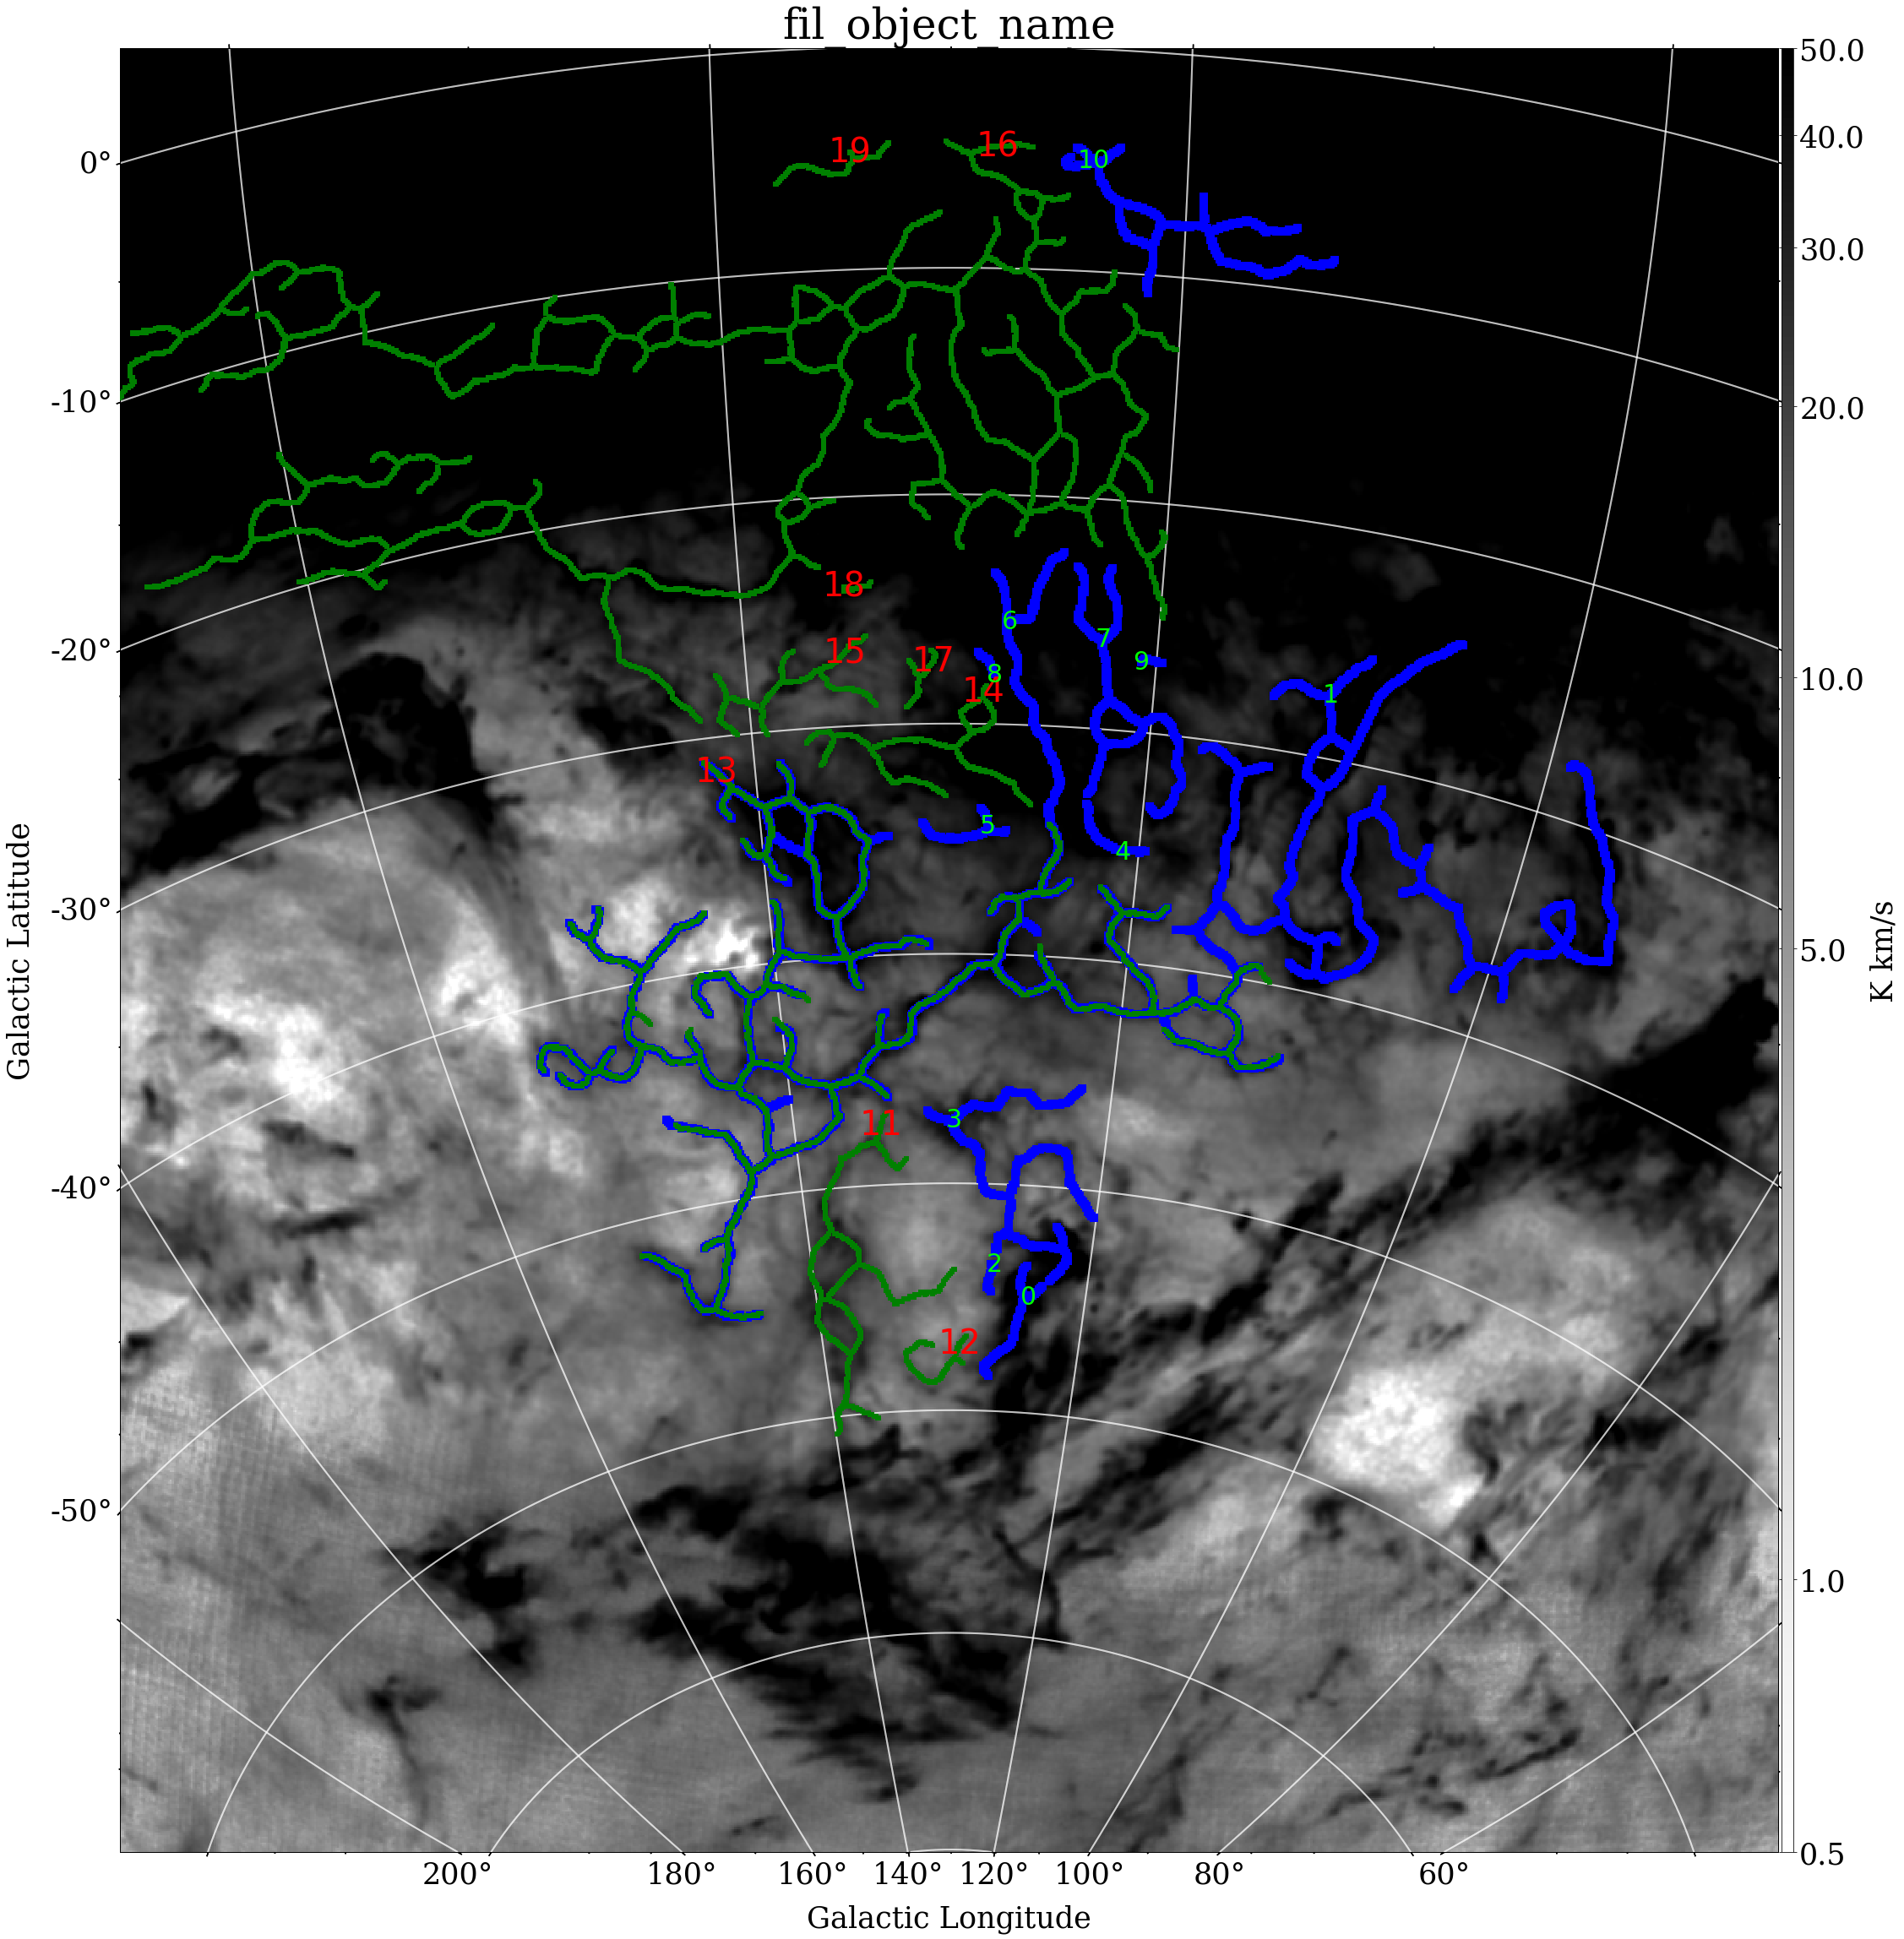

In [10]:
Catalog.fil_mapping(ii_hdu, fil_right_obj = fil_right, fil_left_obj = fil_left)

100%|███████████████████████████████████████████| 16/16 [00:02<00:00,  5.86it/s]


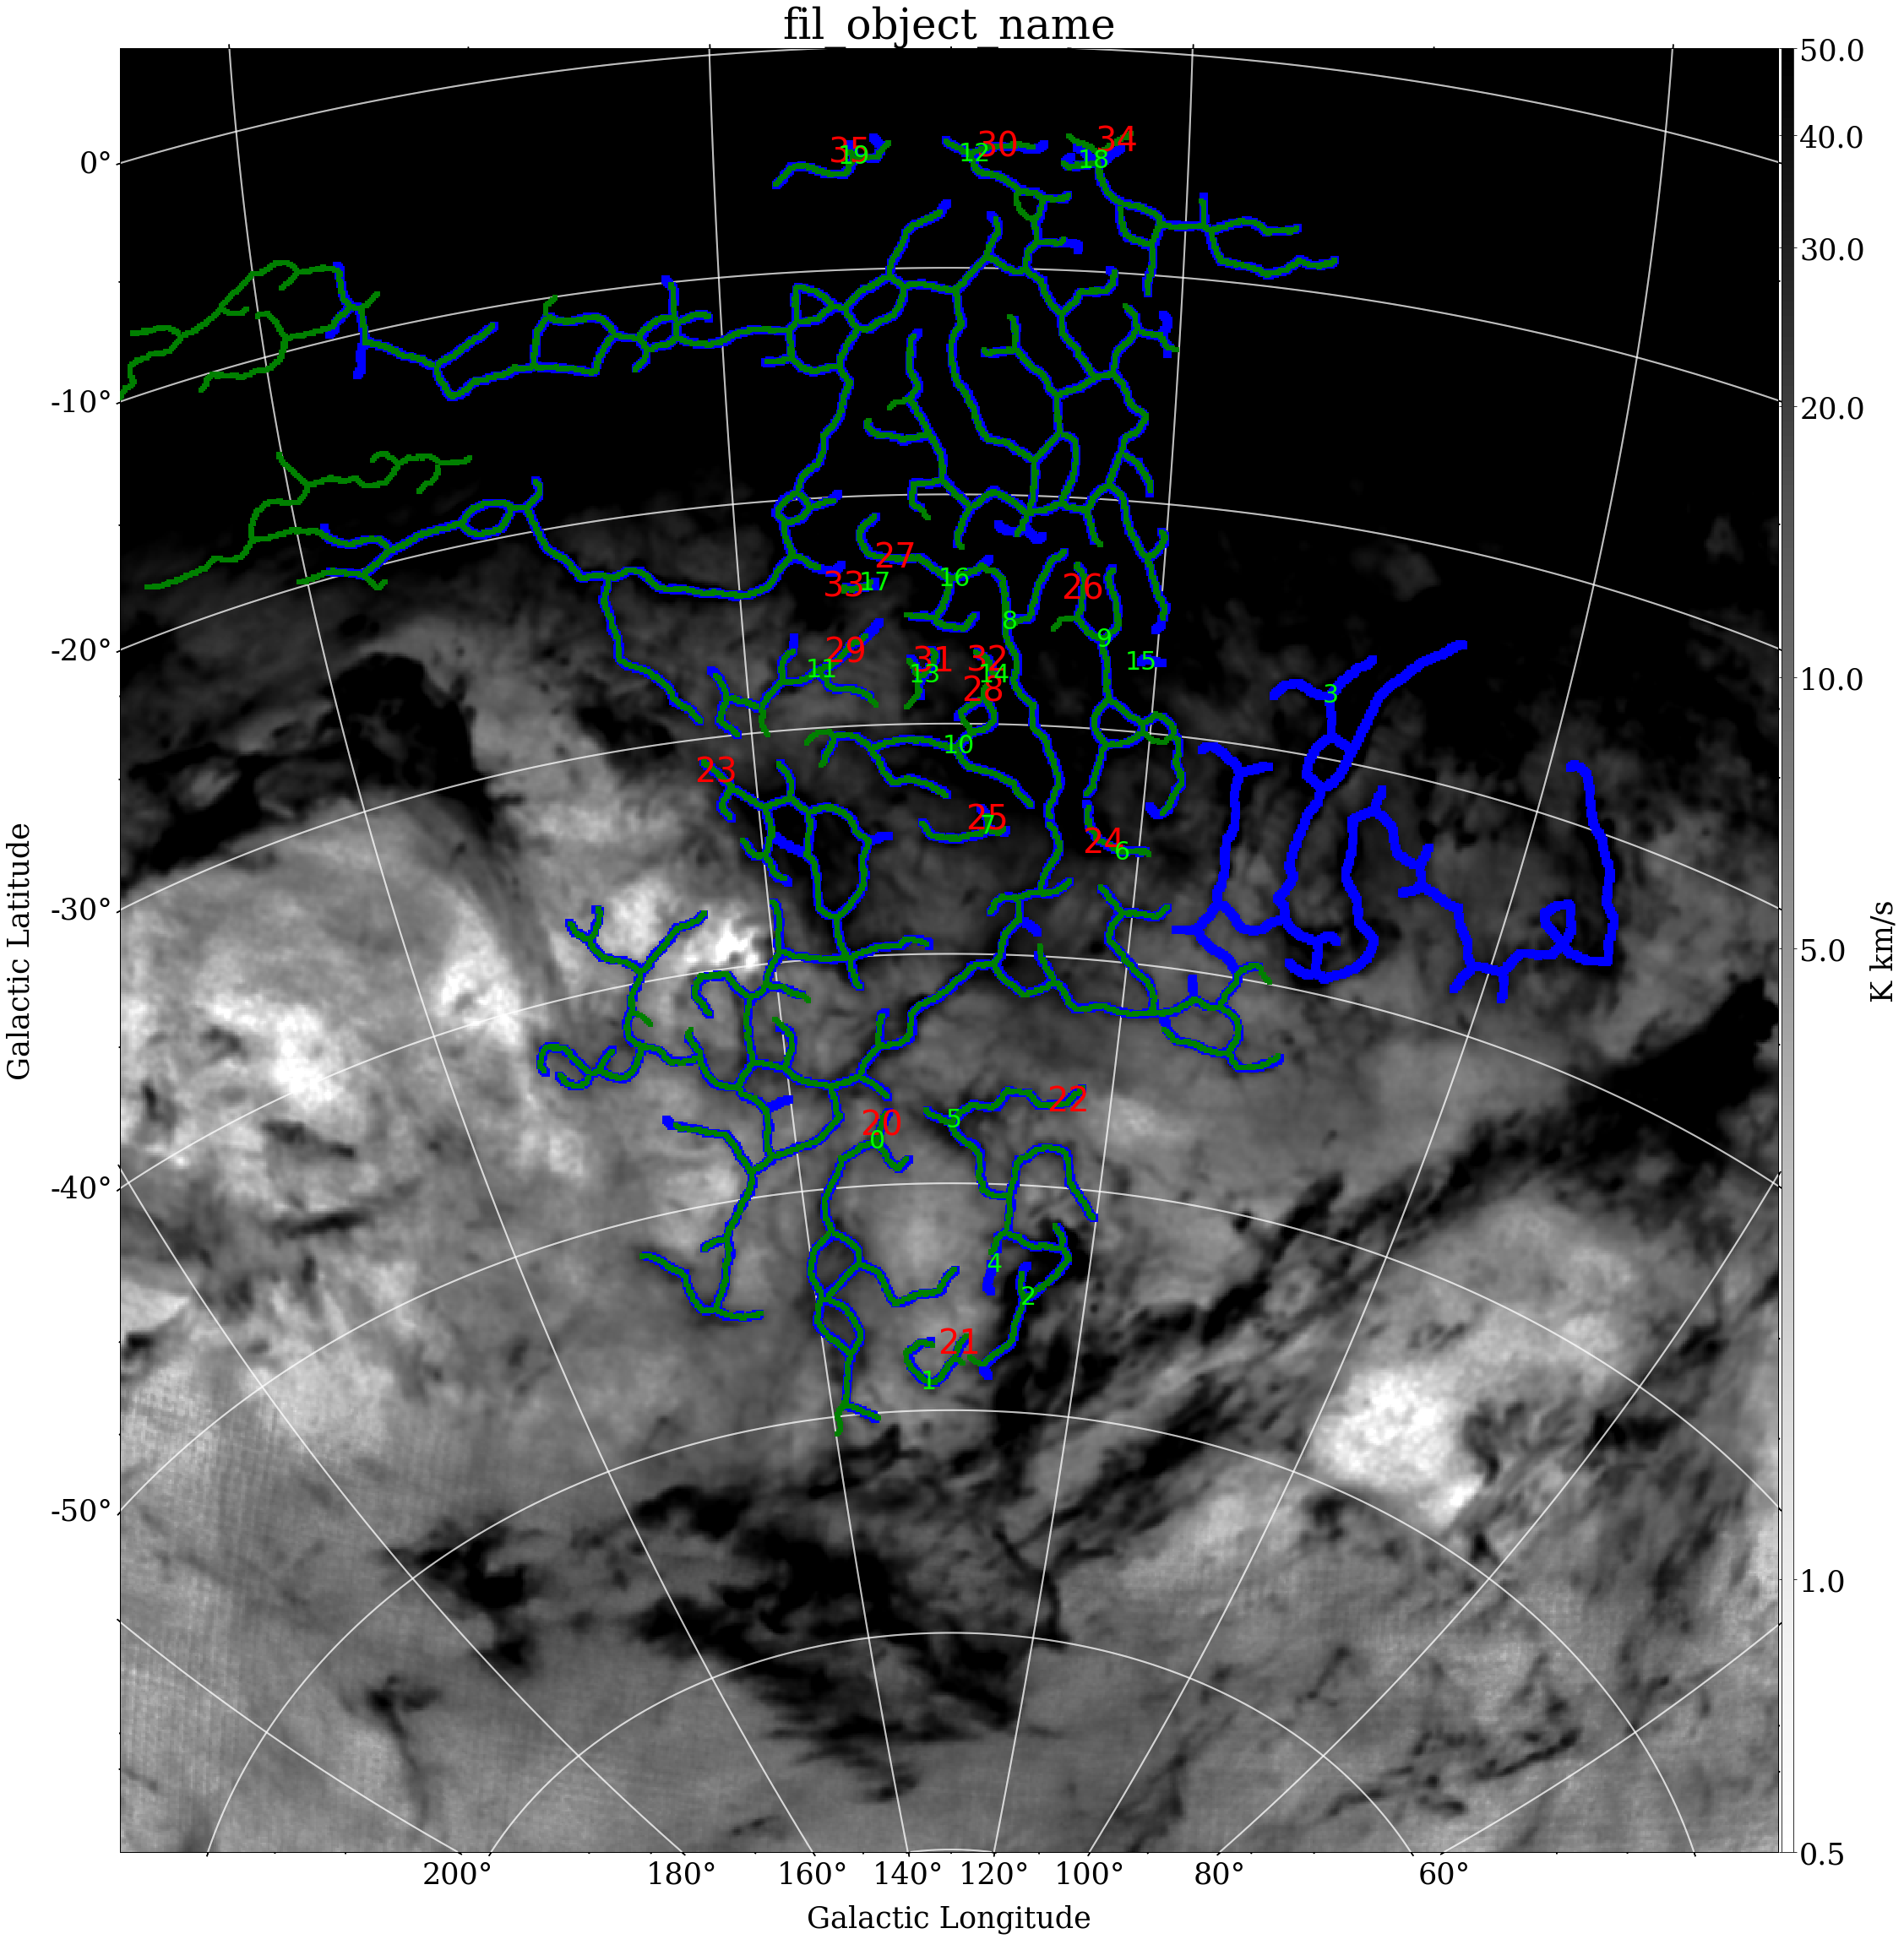

In [11]:
Catalog.fil_mapping(ii_hdu, fil_right_obj = fil_right_, fil_left_obj = fil_left_)

100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.90it/s]


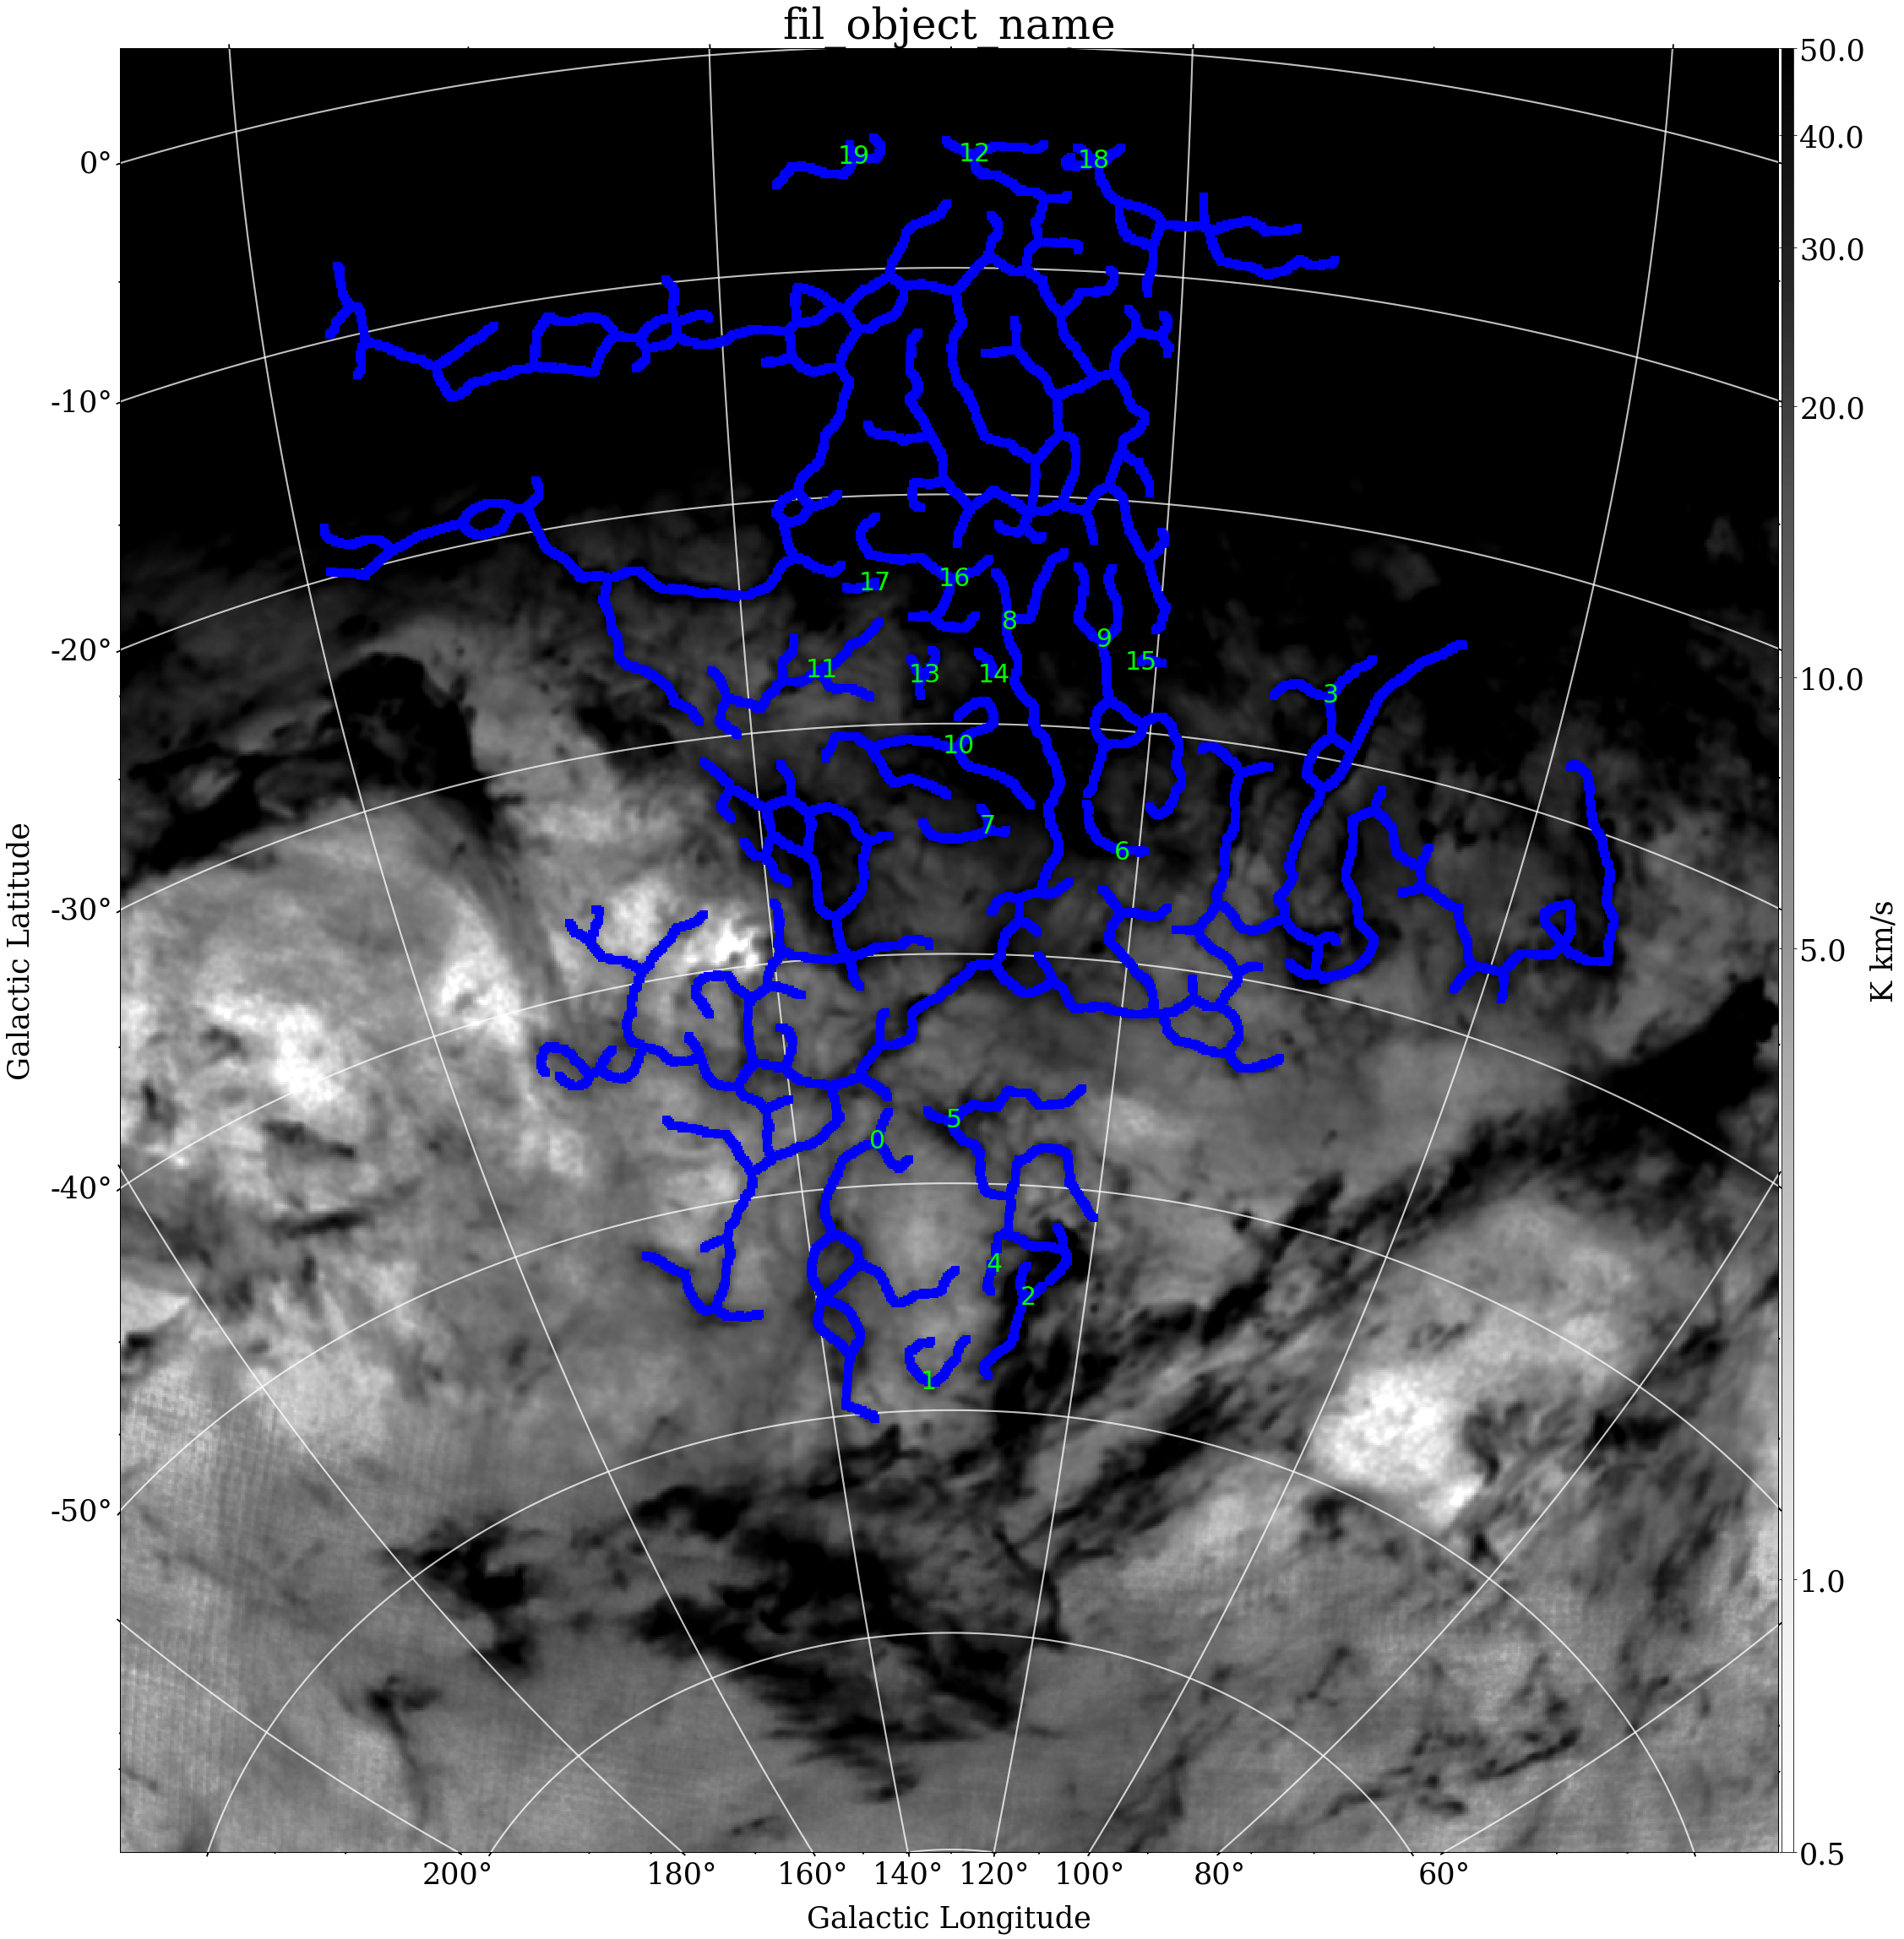

In [12]:
Catalog.fil_mapping(ii_hdu, fil_right_obj = fil_right_)

100%|███████████████████████████████████████████| 16/16 [00:02<00:00,  5.82it/s]


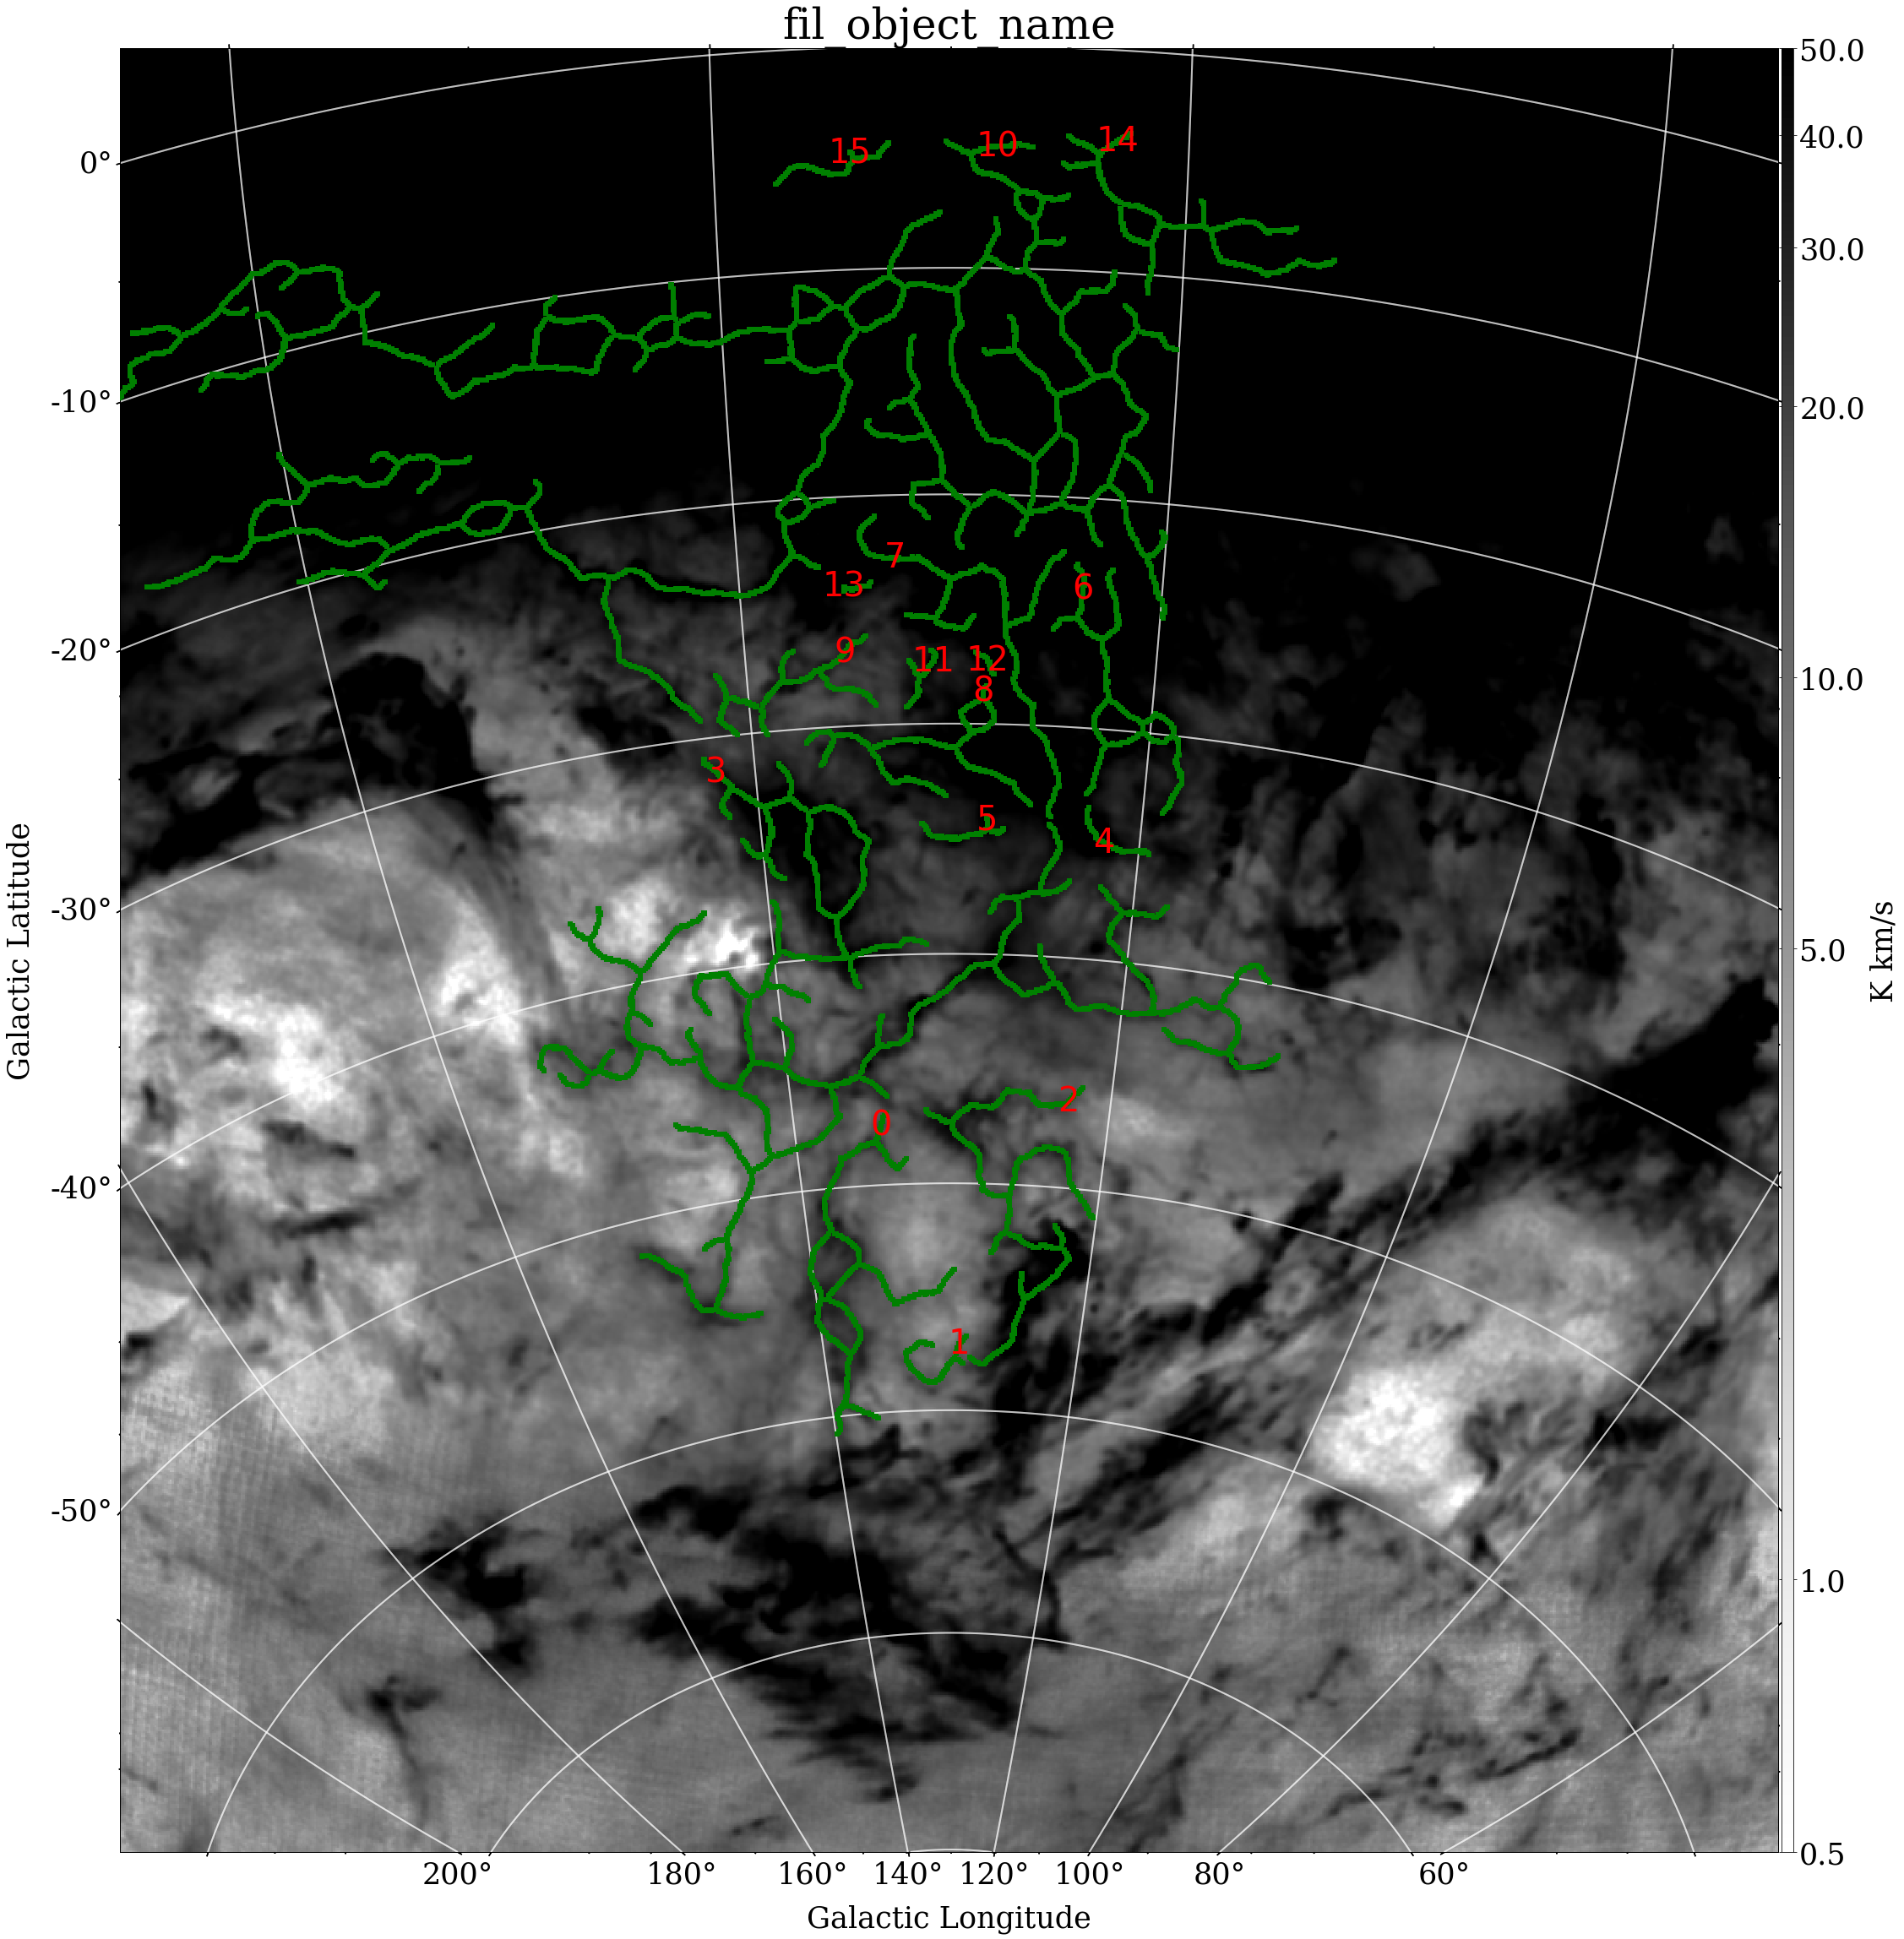

In [13]:
Catalog.fil_mapping(ii_hdu, fil_left_obj = fil_left_)

In [25]:
new_fil_right, new_fil_left = Catalog.fil_right, Catalog.fil_left

# new_fil_right,new_fil_left = Catalog.del_filament(fil_right=fil_right, fil_left=fil_left, right_number= 1)

# new_fil_right,new_fil_left = Catalog.add_filament(fil_right=new_fil_right, fil_left=new_fil_left, \
#                         fil_right_=fil_right_, fil_left_=fil_left_, right_number= 3)


<Figure size 576x576 with 0 Axes>

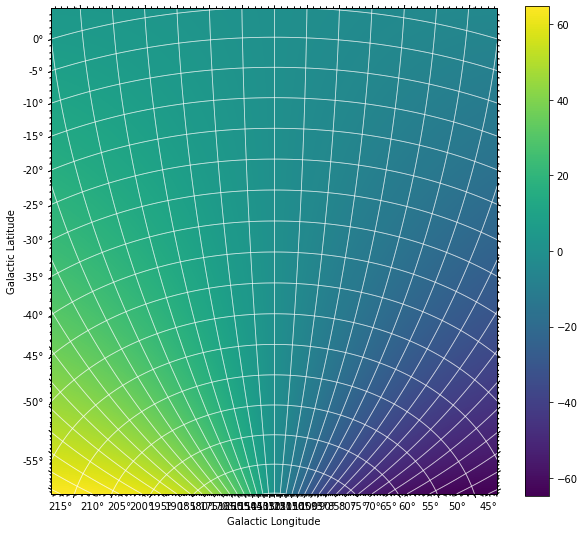

100%|███████████████████████████████████████████| 20/20 [00:04<00:00,  4.02it/s]


T Kkm/s  M Msolar  orientation [deg]  length [pix]  width [pix]
filament 0   3.44e+04  1.06e+03             -15.77         71.01          8.0
filament 1   9.86e+05  3.03e+04              42.34       1206.80          9.0
filament 2   3.94e+03  1.21e+02             -10.90         24.53          8.0
filament 3   9.20e+04  2.83e+03              72.65        229.03         10.0
filament 4   5.12e+04  1.58e+03              57.78         50.46         18.0
filament 5   1.39e+04  4.29e+02              84.65         60.54          5.0
filament 6   1.59e+05   4.9e+03               1.53        189.87         10.0
filament 7   2.79e+05  8.59e+03              -1.30        229.40         15.0
filament 8   1.45e+04  4.46e+02              38.08         25.71         10.0
filament 9   6.15e+03  1.89e+02              85.57         18.80          6.0
filament 10  2.42e+06  7.46e+04              73.57        211.41         10.0
filament 11   5.6e+04  1.72e+03              -3.86        228.35          7.0
filament 12  7.13e+03  2.19e+02             -40.67         78.98          7.0
filament 13   4.6e+05  1.42e+04             -45.50        729.55          9.0
filament 14  1.88e+05  5.78e+03              85.26        149.78         13.0
filament 15  3.82e+04  1.18e+03              78.80        133.16          7.0
filament 16  7.57e+06  2.33e+05             -84.42       1168.38          9.0
filament 17  1.44e+04  4.44e+02             -26.88         44.06          7.0
filament 18  1.54e+04  4.74e+02             -80.01         27.02         11.0
filament 19  4.40e+05  1.36e+04             -76.39         73.36         11.0

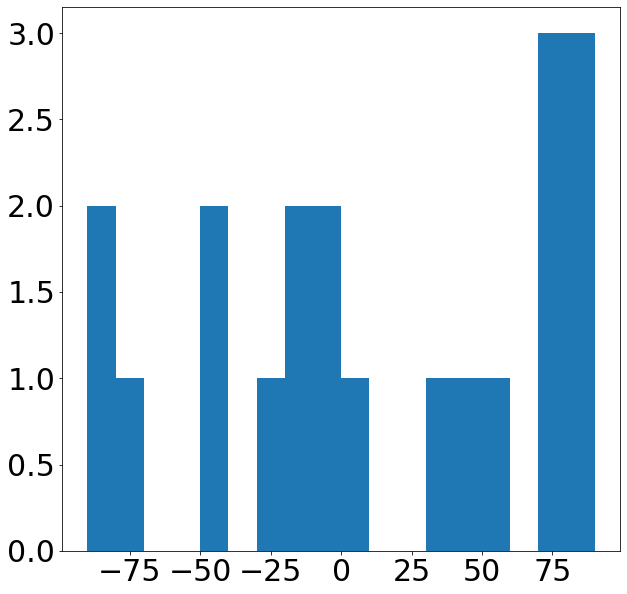

In [26]:
#全体
total_fil = Catalog.make_total_fil(fil_right_obj=new_fil_right, fil_left_obj=new_fil_left)

ori_dict = Catalog.make_PA(ii_hdu=ii_hdu, total_fil=total_fil)
Catalog.make_fil_table(total_fil=total_fil)

<Figure size 576x576 with 0 Axes>

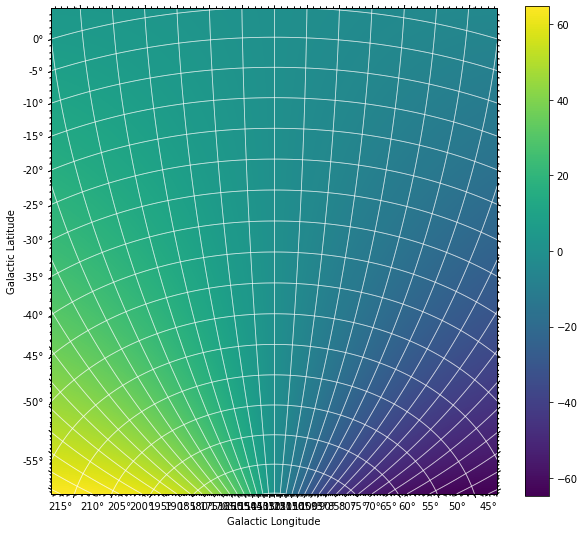

100%|███████████████████████████████████████████| 11/11 [00:02<00:00,  5.14it/s]


T Kkm/s  M Msolar  orientation [deg]  length [pix]  width [pix]
filament 0   3.44e+04  1.06e+03             -15.77         71.01          8.0
filament 1   9.86e+05  3.03e+04              42.34       1206.80          9.0
filament 2   3.94e+03  1.21e+02             -10.90         24.53          8.0
filament 3   9.20e+04  2.83e+03              72.65        229.03         10.0
filament 4   5.12e+04  1.58e+03              57.78         50.46         18.0
filament 5   1.39e+04  4.29e+02              84.65         60.54          5.0
filament 6   1.59e+05   4.9e+03               1.53        189.87         10.0
filament 7   2.79e+05  8.59e+03              -1.30        229.40         15.0
filament 8   1.45e+04  4.46e+02              38.08         25.71         10.0
filament 9   6.15e+03  1.89e+02              85.57         18.80          6.0
filament 10  2.42e+06  7.46e+04              73.57        211.41         10.0

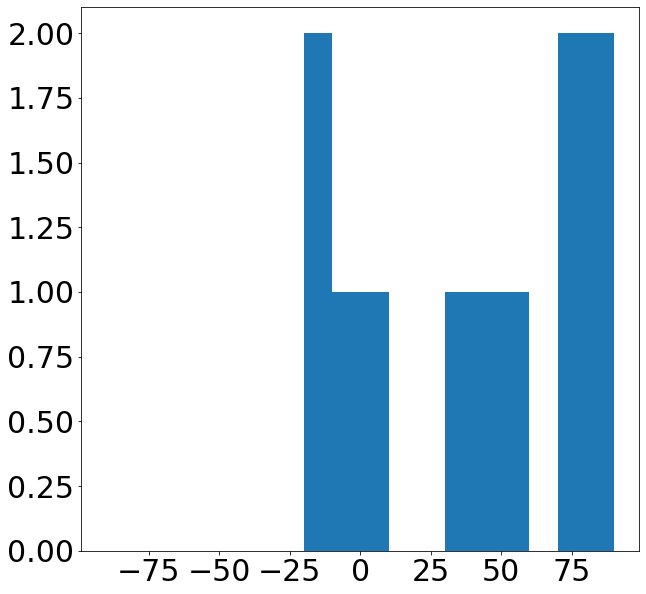

In [27]:
total_fil = Catalog.make_total_fil(fil_right_obj=new_fil_right)

ori_dict = Catalog.make_PA(ii_hdu=ii_hdu, total_fil=total_fil)
Catalog.make_fil_table(total_fil=total_fil,key="right")

<Figure size 576x576 with 0 Axes>

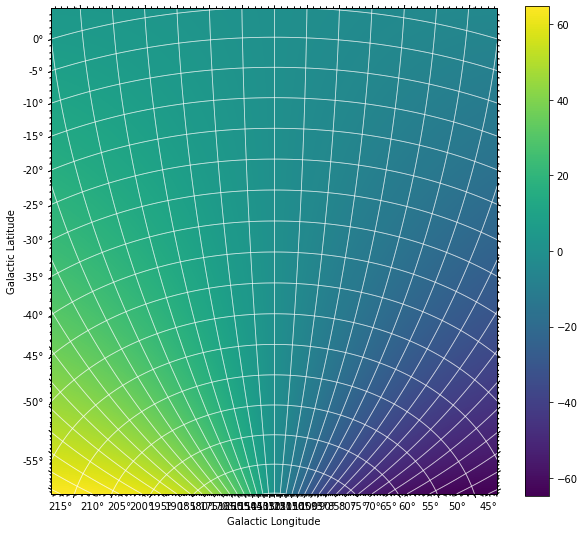

100%|█████████████████████████████████████████████| 9/9 [00:02<00:00,  3.06it/s]


T Kkm/s  M Msolar  orientation [deg]  length [pix]  width [pix]
filament 0   5.6e+04  1.72e+03              -3.86        228.35          7.0
filament 1  7.13e+03  2.19e+02             -40.67         78.98          7.0
filament 2   4.6e+05  1.42e+04             -45.50        729.55          9.0
filament 3  1.88e+05  5.78e+03              85.26        149.78         13.0
filament 4  3.82e+04  1.18e+03              78.80        133.16          7.0
filament 5  7.57e+06  2.33e+05             -84.42       1168.38          9.0
filament 6  1.44e+04  4.44e+02             -26.88         44.06          7.0
filament 7  1.54e+04  4.74e+02             -80.01         27.02         11.0
filament 8  4.40e+05  1.36e+04             -76.39         73.36         11.0

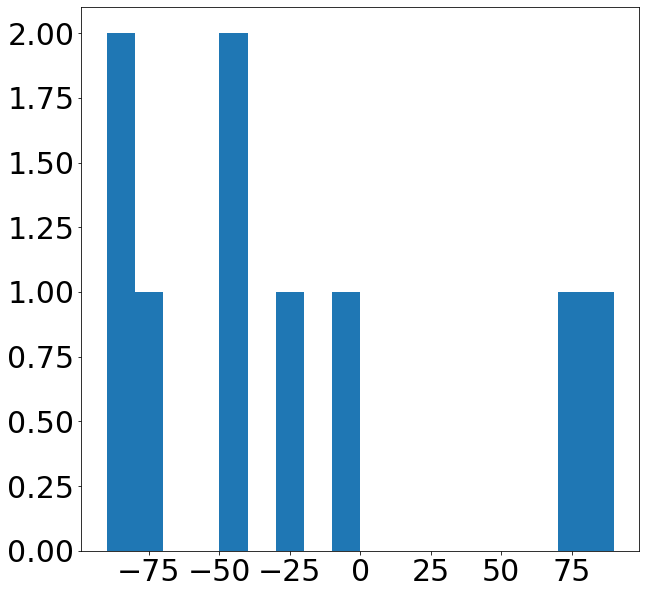

In [28]:
total_fil = Catalog.make_total_fil(fil_left_obj=new_fil_left)

ori_dict = Catalog.make_PA(ii_hdu=ii_hdu, total_fil=total_fil)
Catalog.make_fil_table(total_fil=total_fil,key="left")

In [21]:
# new_fil_right,new_fil_left = Catalog.del_filament(fil_right=fil_right, fil_left=fil_left, right_number= 1)

In [22]:
# new_fil_right,new_fil_left = Catalog.add_filament(fil_right=new_fil_right, fil_left=new_fil_left, \
#                         fil_right_=fil_right_, fil_left_=fil_left_, right_number= 3)

In [23]:
len(Catalog.fil_right.filaments),len(Catalog.fil_left.filaments)

(11, 9)

In [24]:
len(new_fil_right.filaments),len(new_fil_left.filaments)

(11, 9)

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 14.32it/s]


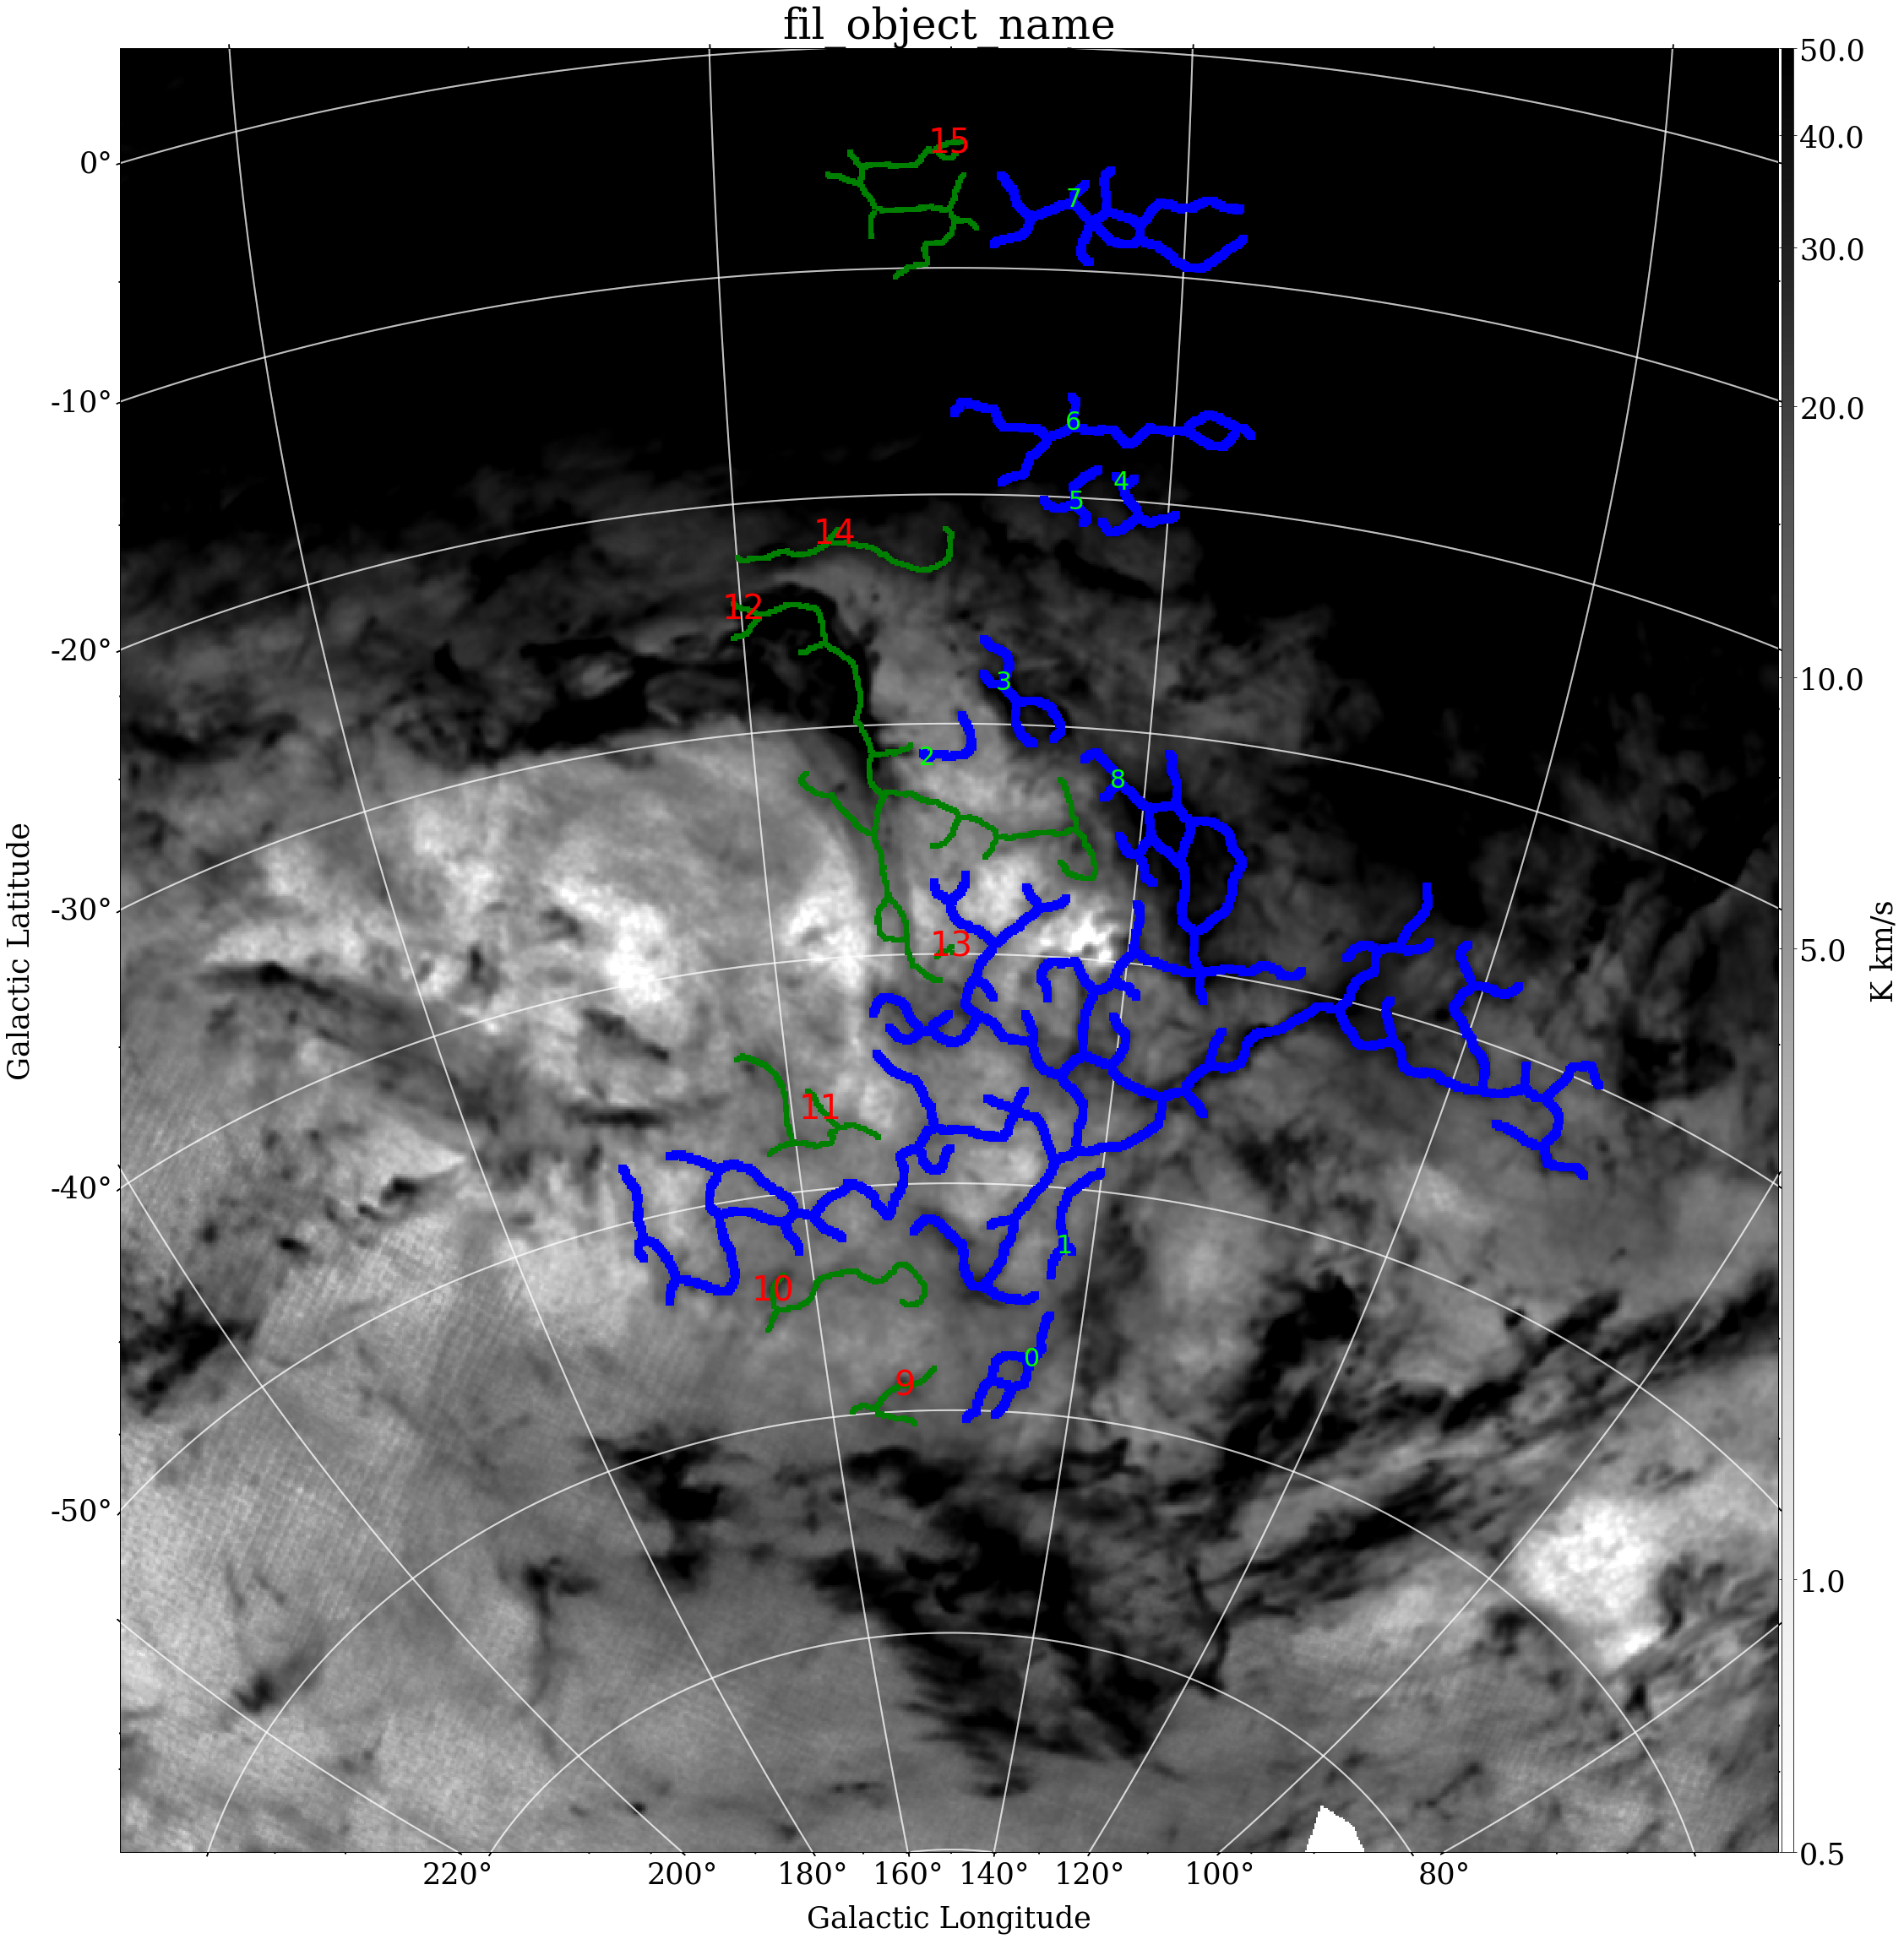

In [150]:
Catalog.fil_mapping(ii_hdu, fil_right_obj = new_fil_right, fil_left_obj = new_fil_left)

In [155]:
total_fil = Catalog.make_total_fil(fil_right_obj=new_fil_left)

<Figure size 576x576 with 0 Axes>

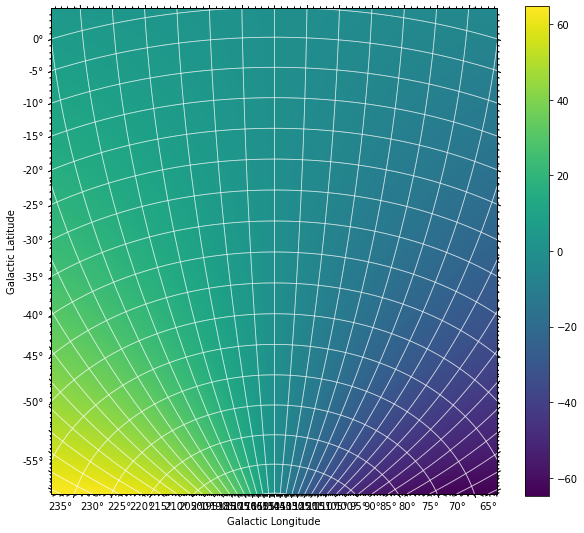

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00,  9.21it/s]


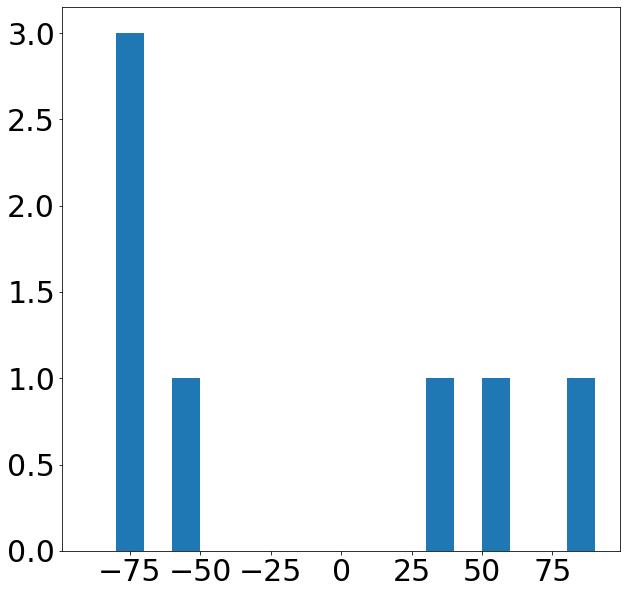

In [156]:
ori_dict = Catalog.make_PA(ii_hdu=ii_hdu, total_fil=total_fil)